In [8]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform, img_as_float

def CompressImage(filename):
    """
    Compresses an image using Singular Value Decomposition (SVD) and displays
    the original and compressed images for various ranks.

    Parameters:
    ----------
    filename : str
        Path to the image file to be compressed.

    Returns:
    -------
    None
        Displays the original and compressed images using matplotlib.
    """
    # Step 1: Read the Image and Convert to Grayscale
    image_rgb = io.imread(filename)

    # Convert to grayscale if the image is colored
    if image_rgb.ndim == 3:
        image_gray = color.rgb2gray(image_rgb)
    else:
        image_gray = image_rgb.astype(float)

    # Step 2: Resize the Image to 50% of its Original Size
    image_resized = transform.resize(image_gray, 
                                     (int(image_gray.shape[0] * 0.5), 
                                      int(image_gray.shape[1] * 0.5)), 
                                     anti_aliasing=True)
    
    # Convert the image to floating point representation
    image = img_as_float(image_resized)

    # Step 3: Display the Original Image
    plt.figure(figsize=(12, 16))
    plt.subplot(4, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Step 4: Perform Singular Value Decomposition (SVD)
    U, S, Vt = np.linalg.svd(image, full_matrices=False)

    # Step 5: Define the Desired Ranks for Compression
    ranks = [320, 160, 80, 40, 20, 10, 5]
    max_rank = min(image.shape)
    ranks = [rank for rank in ranks if rank <= max_rank]

    # Step 6: Iterate Over Each Desired Rank to Compress the Image
    for i, rank in enumerate(ranks):
        # Keep only the top 'rank' singular values
        compressed_S = np.zeros_like(S)
        compressed_S[:rank] = S[:rank]
        
        # Create the compressed diagonal matrix
        compressed_S_matrix = np.diag(compressed_S)

        # Reconstruct the compressed image
        approx_image = np.dot(U, np.dot(compressed_S_matrix, Vt))

        # Display the compressed image
        plt.subplot(4, 2, i + 2)
        plt.imshow(approx_image, cmap='gray')
        plt.title(f'Rank {rank} Image')
        plt.axis('off')

    # Step 7: Adjust Layout and Display All Plots
    plt.tight_layout()
    plt.show()


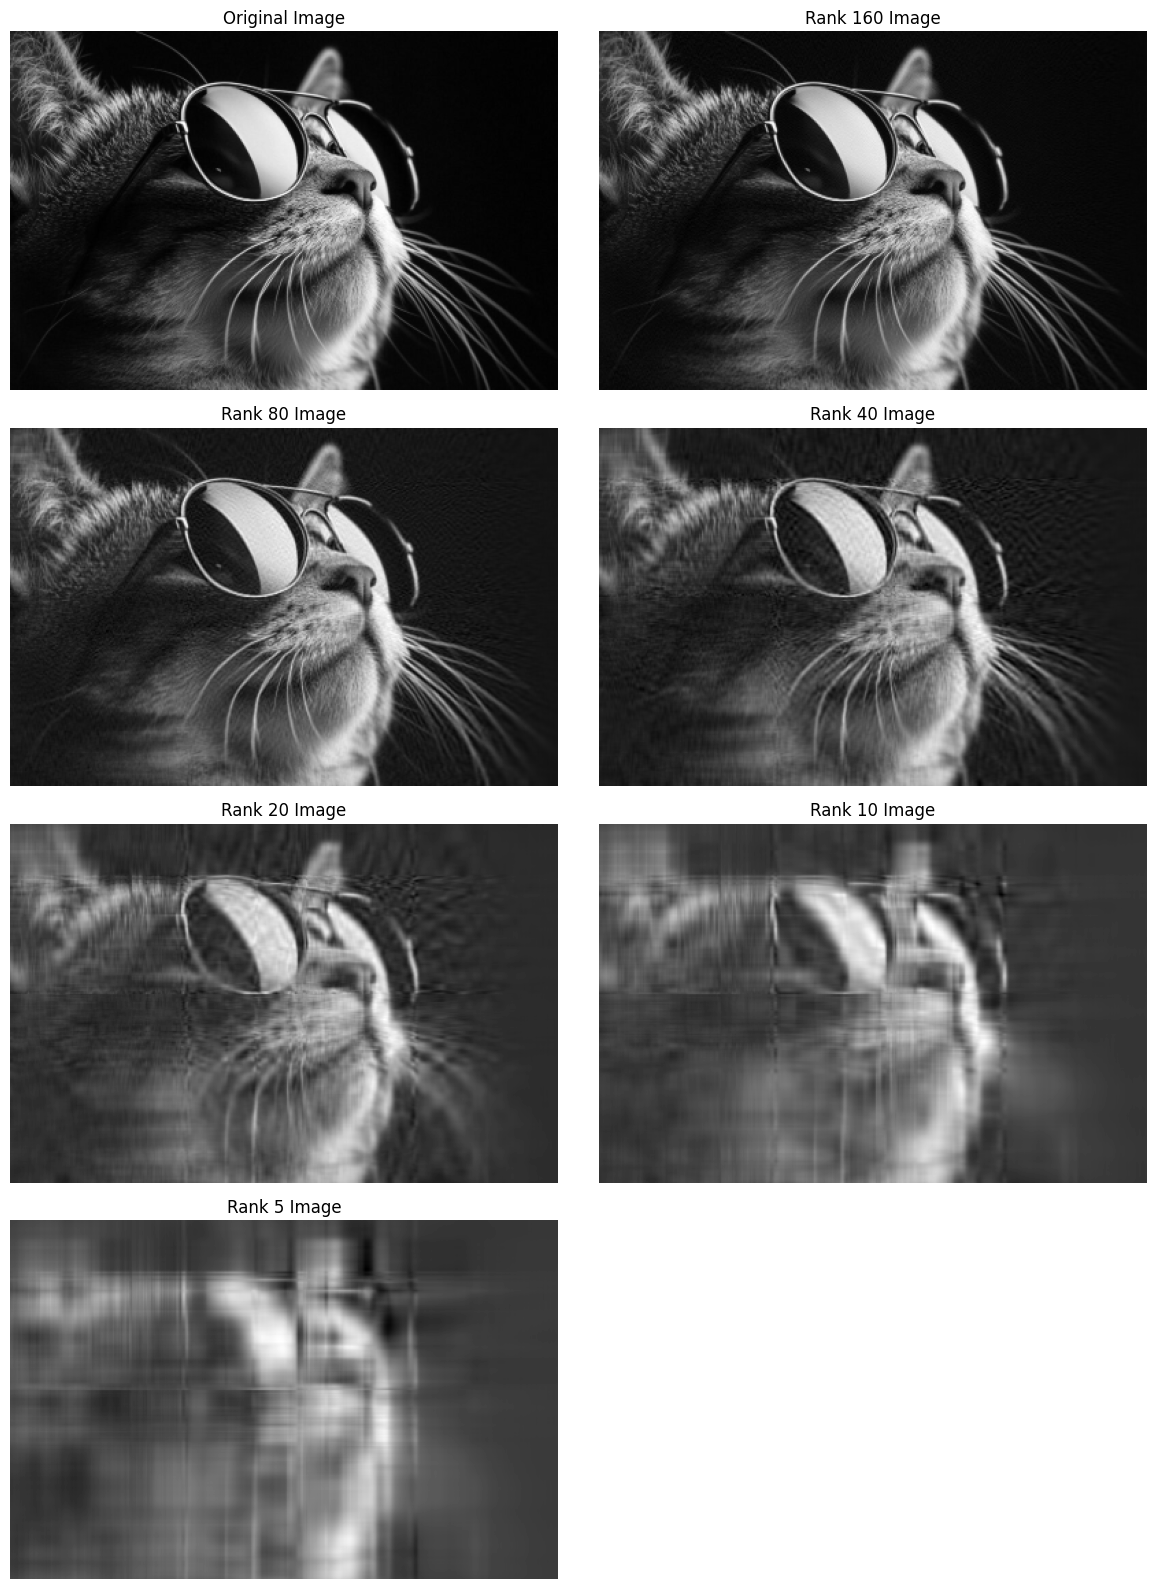

In [9]:
CompressImage("image.png")
